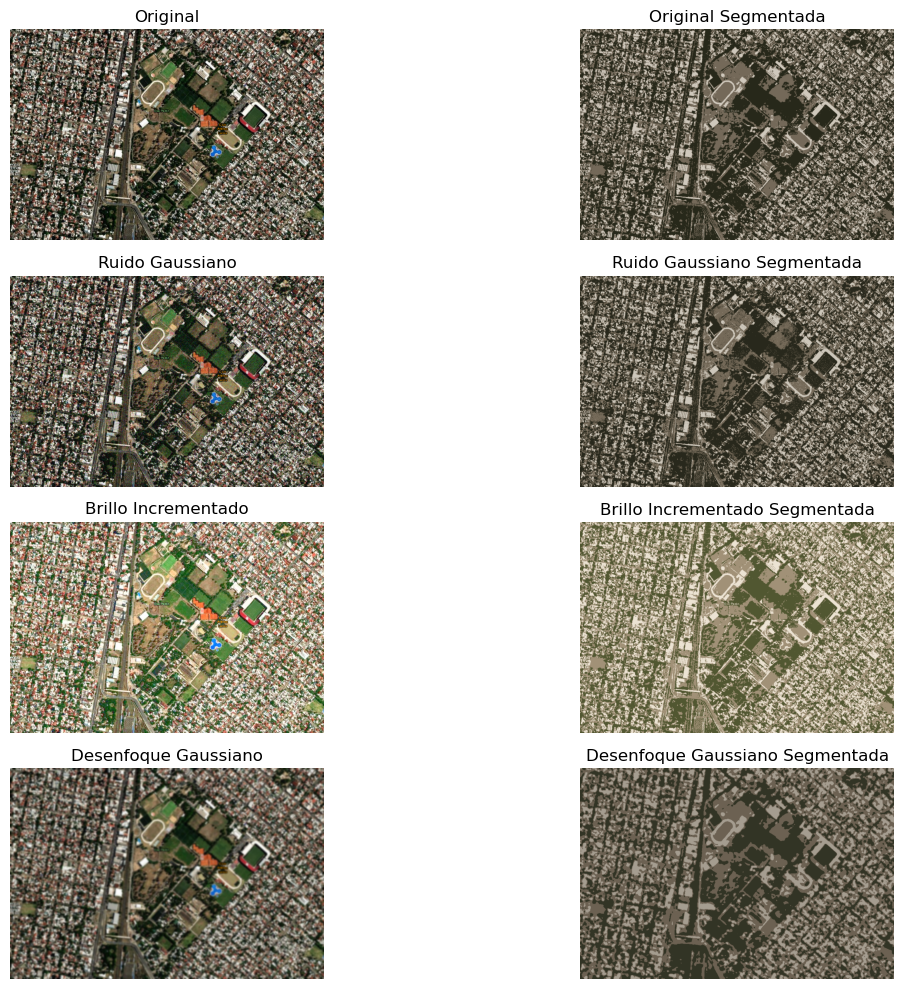

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def add_noise(image):
    # Agregar ruido gaussiano
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_image

def change_brightness(image, value=30):
    # Cambiar brillo de la imagen
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[:, :, 2] = hsv[:, :, 2] + value
    hsv[:, :, 2][hsv[:, :, 2] > 255] = 255
    hsv = np.array(hsv, dtype=np.uint8)
    bright_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return bright_image

def add_blur(image):
    # Aplicar desenfoque gaussiano
    blurred_image = cv2.GaussianBlur(image, (11, 11), 0)
    return blurred_image

def kmeans_classification(image, k=3):
    # Convertir imagen a formato de K-means
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Configurar criterios y aplicar K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir centros a enteros y reconstruir la imagen
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Ruta de la imagen original
image_path = 'lanus.png'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Crear versiones contaminadas
noisy_image = add_noise(original_image)
bright_image = change_brightness(original_image, value=60)
blurred_image = add_blur(original_image)

# Aplicar K-medias a cada versión contaminada
segmented_original = kmeans_classification(original_image)
segmented_noisy = kmeans_classification(noisy_image)
segmented_bright = kmeans_classification(bright_image)
segmented_blurred = kmeans_classification(blurred_image)

# Mostrar todas las imágenes y sus versiones segmentadas
images = {
    "Original": original_image,
    "Ruido Gaussiano": noisy_image,
    "Brillo Incrementado": bright_image,
    "Desenfoque Gaussiano": blurred_image
}
segmented_images = {
    "Segmentada Original": segmented_original,
    "Segmentada Ruido Gaussiano": segmented_noisy,
    "Segmentada Brillo Incrementado": segmented_bright,
    "Segmentada Desenfoque Gaussiano": segmented_blurred
}

plt.figure(figsize=(14, 10))
for i, (title, img) in enumerate(images.items()):
    plt.subplot(4, 2, 2*i + 1)
    plt.title(title)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(4, 2, 2*i + 2)
    plt.title(f'{title} Segmentada')
    plt.imshow(segmented_images[f'Segmentada {title}'])
    plt.axis('off')

plt.tight_layout()
plt.show()
